In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
#loading 
bigmart_dataframe = pd.read_csv("/Users/pouniq/Downloads/Data/datasets/project/bigmart_sales_data/code/Train.csv")
bigmart_test = pd.read_csv("/Users/pouniq/Downloads/Data/datasets/project/bigmart_sales_data/bigmart-sales/bigmart_sales_data/data/Test.csv")
df_test = bigmart_test
df = bigmart_dataframe.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#DATA analysis

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# taking care of missing values
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True)
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace = True)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


distributaion of numerical data

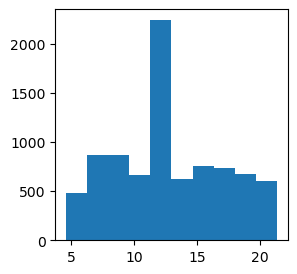

In [12]:
#item weight dis 
plt.figure(figsize=(3,3))
plt.hist(df["Item_Weight"]);
plt.show()


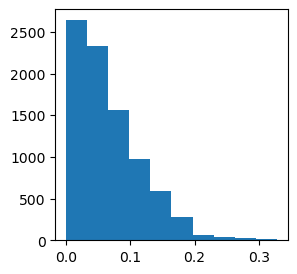

In [13]:
#Item_Visibility
plt.figure(figsize=(3,3))
plt.hist(df["Item_Visibility"]);
plt.show()

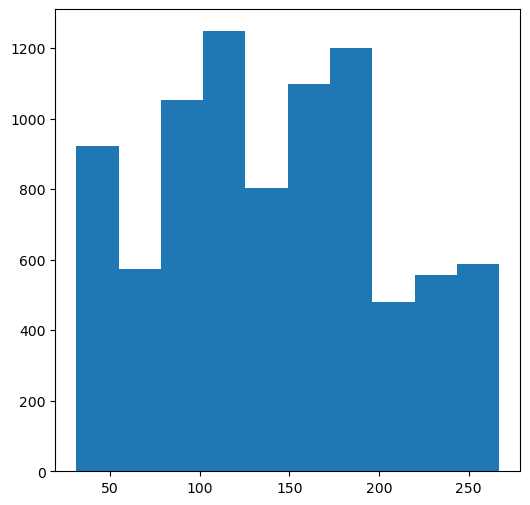

In [14]:
#Item_MRP  
plt.figure(figsize=(6,6))
plt.hist(df["Item_MRP"]);
plt.show()

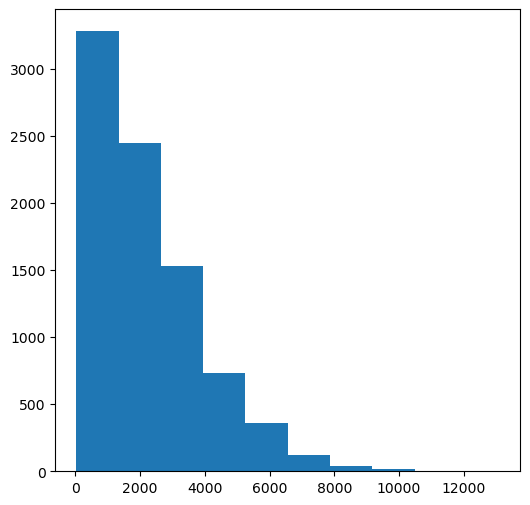

In [15]:
#Item_Outlet_Sales  
plt.figure(figsize=(6,6))
plt.hist(df["Item_Outlet_Sales"]);
plt.show()

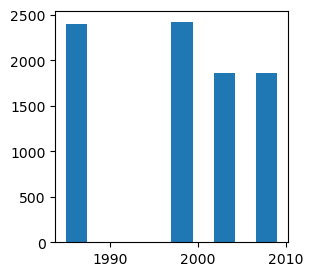

In [16]:
plt.figure(figsize=(3,3 ))
plt.hist(df["Outlet_Establishment_Year"]);
plt.show()

dis of cat data

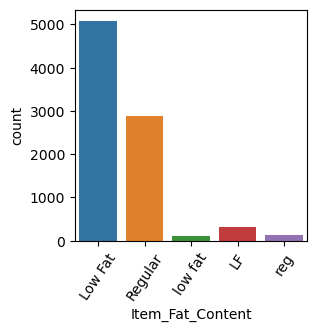

In [17]:
plt.figure(figsize=(3,3))
sns.countplot(x = "Item_Fat_Content",data = df);
plt.xticks(rotation=56)
plt.show()

low fat = LF
Regular = reg


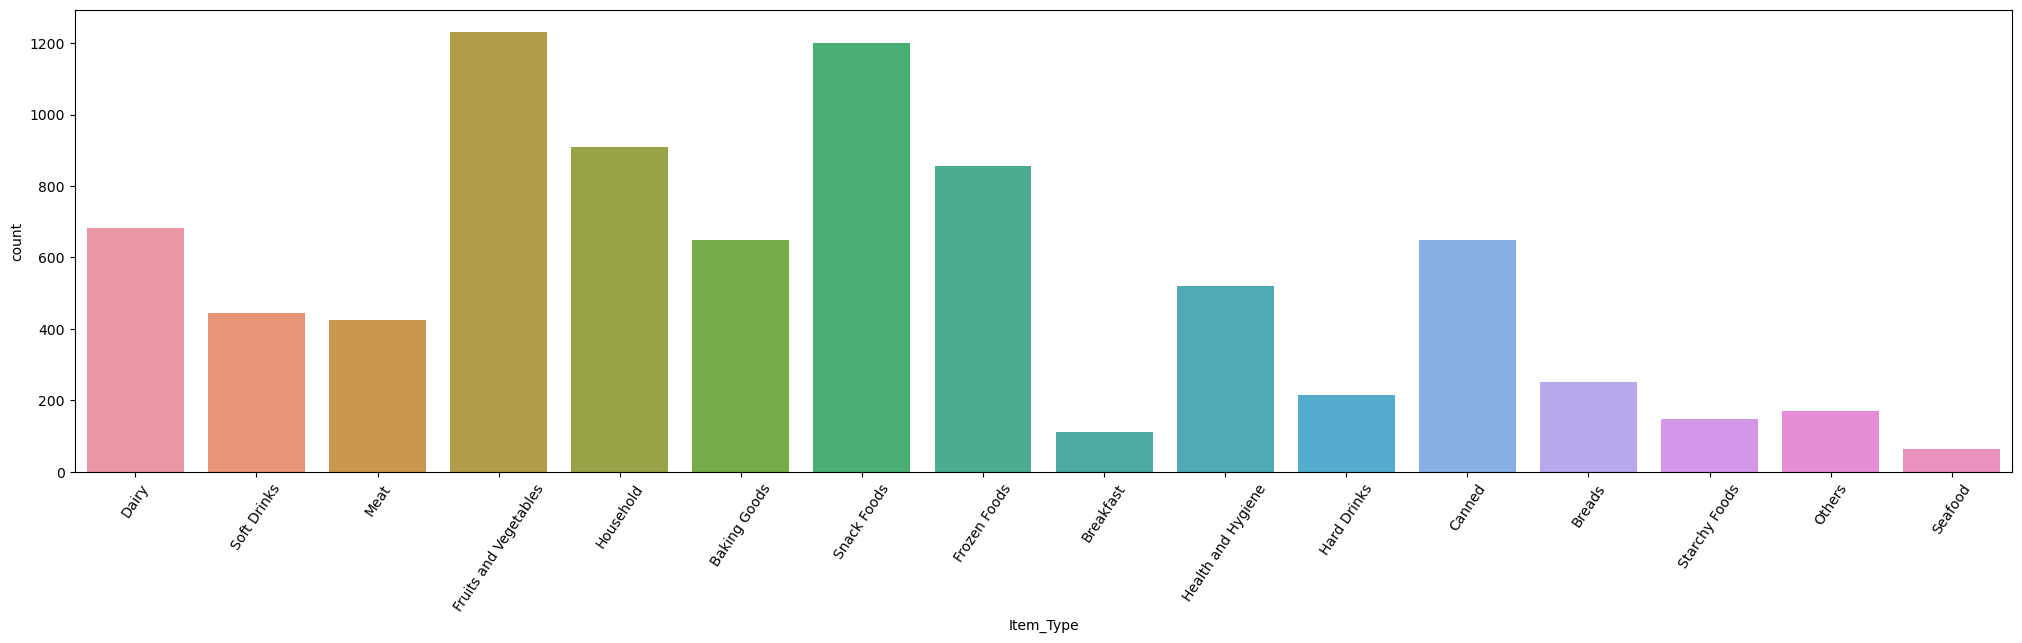

In [18]:
plt.figure(figsize=(25,6))
sns.countplot(x = "Item_Type",data = df);
plt.xticks(rotation=56)
plt.show()

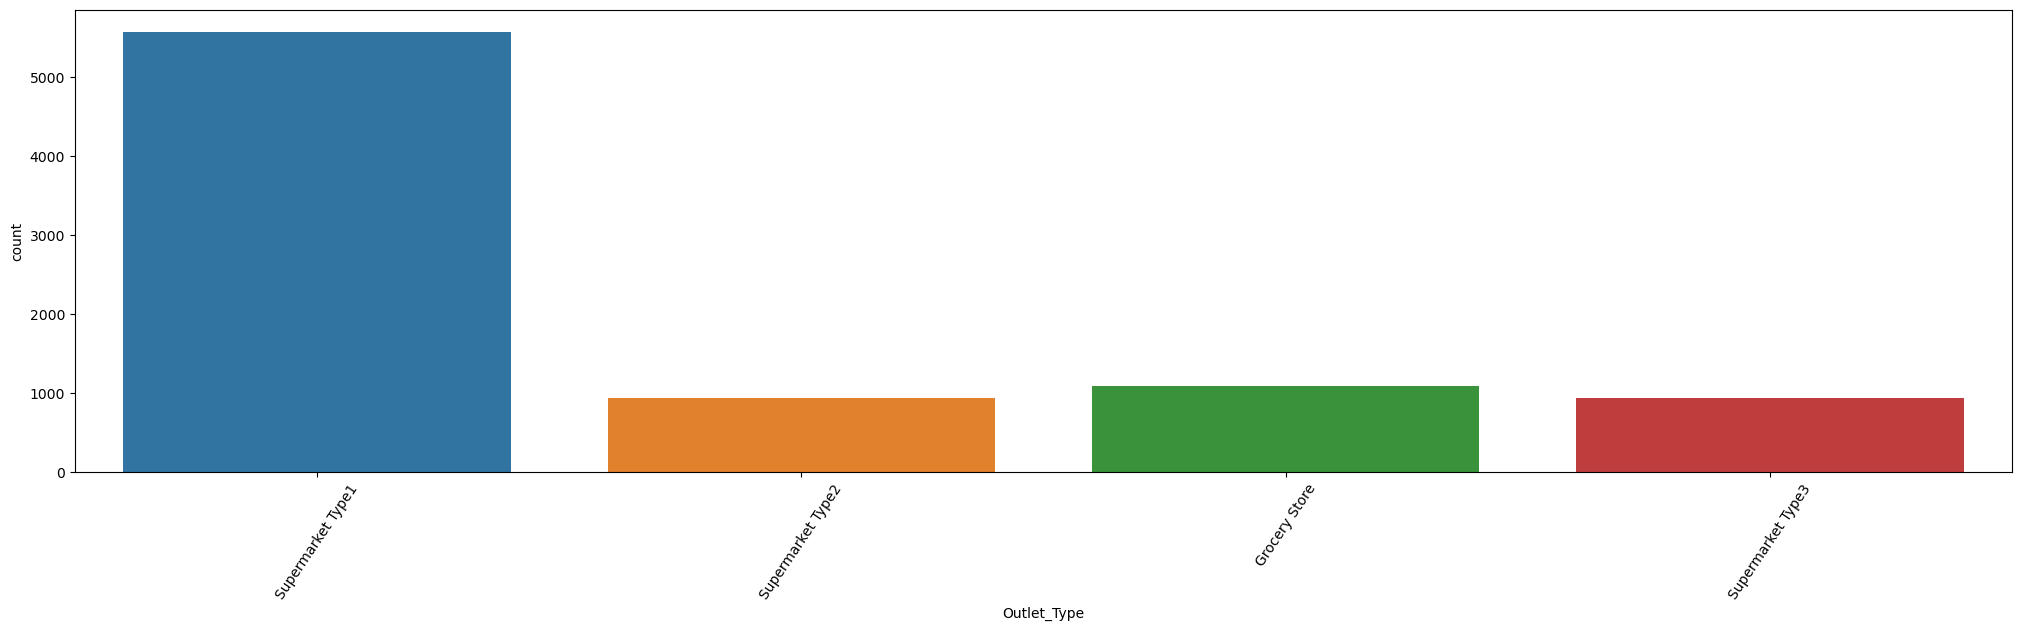

In [19]:
plt.figure(figsize=(25,6))
sns.countplot(x = "Outlet_Type",data = df);
plt.xticks(rotation=56)
plt.show()

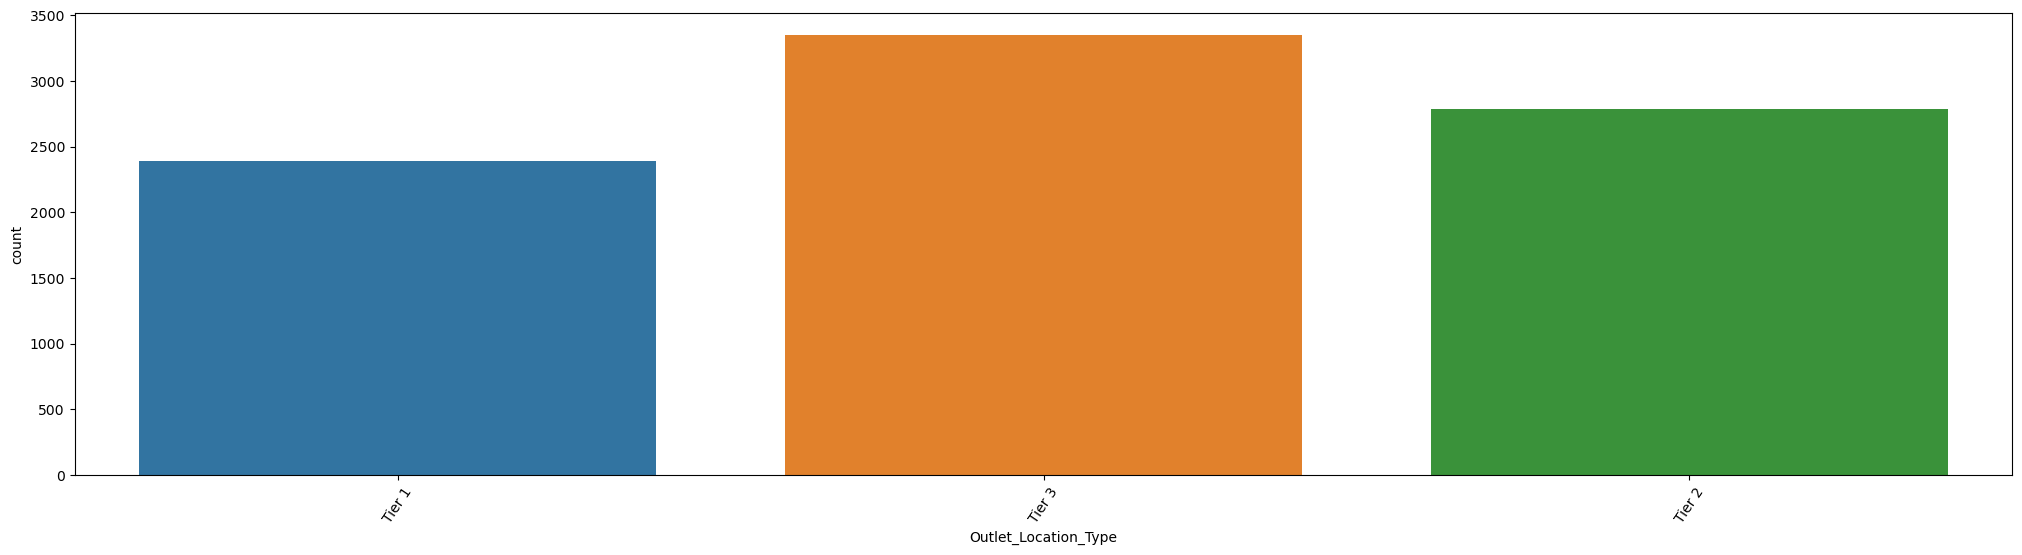

In [20]:
plt.figure(figsize=(25,6))
sns.countplot(x = "Outlet_Location_Type",data = df);
plt.xticks(rotation=56)
plt.show()

data preprocessing
=> cat -----> numrical
=>  

In [21]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [22]:
df.replace({"Item_Fat_Content": {"low fat":"Low Fat","reg":"Regular","LF":"Low Fat"}},inplace = True)


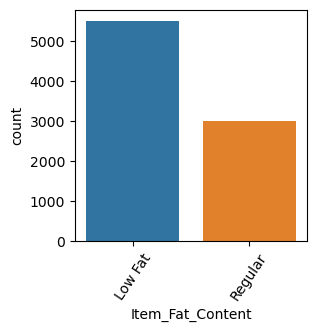

In [23]:
plt.figure(figsize=(3,3))
sns.countplot(x = "Item_Fat_Content",data = df);
plt.xticks(rotation=56)
plt.show()

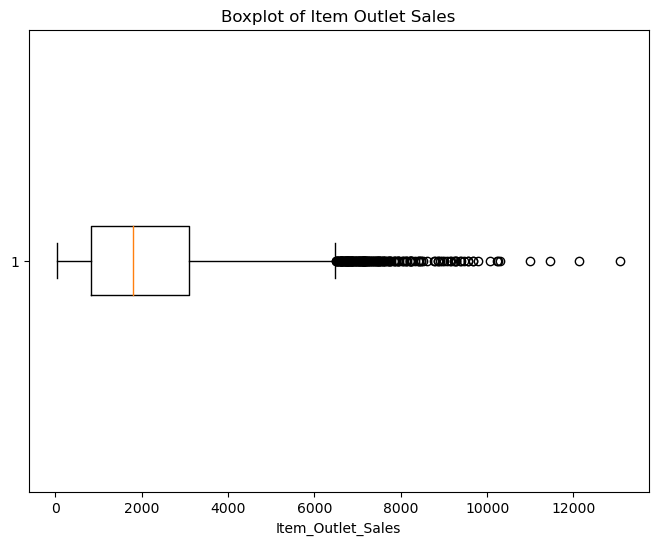

In [24]:
data = df['Item_Outlet_Sales']
plt.figure(figsize=(8, 6)) 
plt.boxplot(data, vert=False) 
plt.xlabel('Item_Outlet_Sales')  
plt.title('Boxplot of Item Outlet Sales')  
plt.show()

In [25]:
#cat ---> numerical
enc = LabelEncoder()

In [26]:
df["Item_Identifier"] = enc.fit_transform(df["Item_Identifier"])
df["Item_Fat_Content"] = enc.fit_transform(df["Item_Fat_Content"])
df["Item_Type"] = enc.fit_transform(df["Item_Type"])
df["Outlet_Identifier"] = enc.fit_transform(df["Outlet_Identifier"])
df["Outlet_Size"] = enc.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"] = enc.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"] = enc.fit_transform(df["Outlet_Type"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [28]:
x = df.drop("Item_Outlet_Sales",axis=1)
y = df["Item_Outlet_Sales"]

In [29]:
print(x.shape , y.shape)

(8523, 11) (8523,)


In [30]:
x_train , x_test , y_train , y_test =  train_test_split(x , y , test_size = 0.3 ,  random_state = 2)

In [31]:
#normalization with minmaxscaler

In [32]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [33]:
print(x.shape ,  x_train.shape , x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [34]:
reg = XGBRegressor()
model = xgb.XGBRegressor(random_state = 42)

In [35]:
 reg.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
pred = reg.predict(x_train)
r2 = metrics.r2_score(y_train , pred)

In [37]:
print(f"prediction = {r2}")

prediction = 0.8879480674665767


In [52]:
pred = reg.predict(x_test)

In [53]:
r2_t = metrics.r2_score(y_test , pred) 

In [54]:
print(f"prediction = {r2_t}")

prediction = 0.5999978689934333


In [41]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


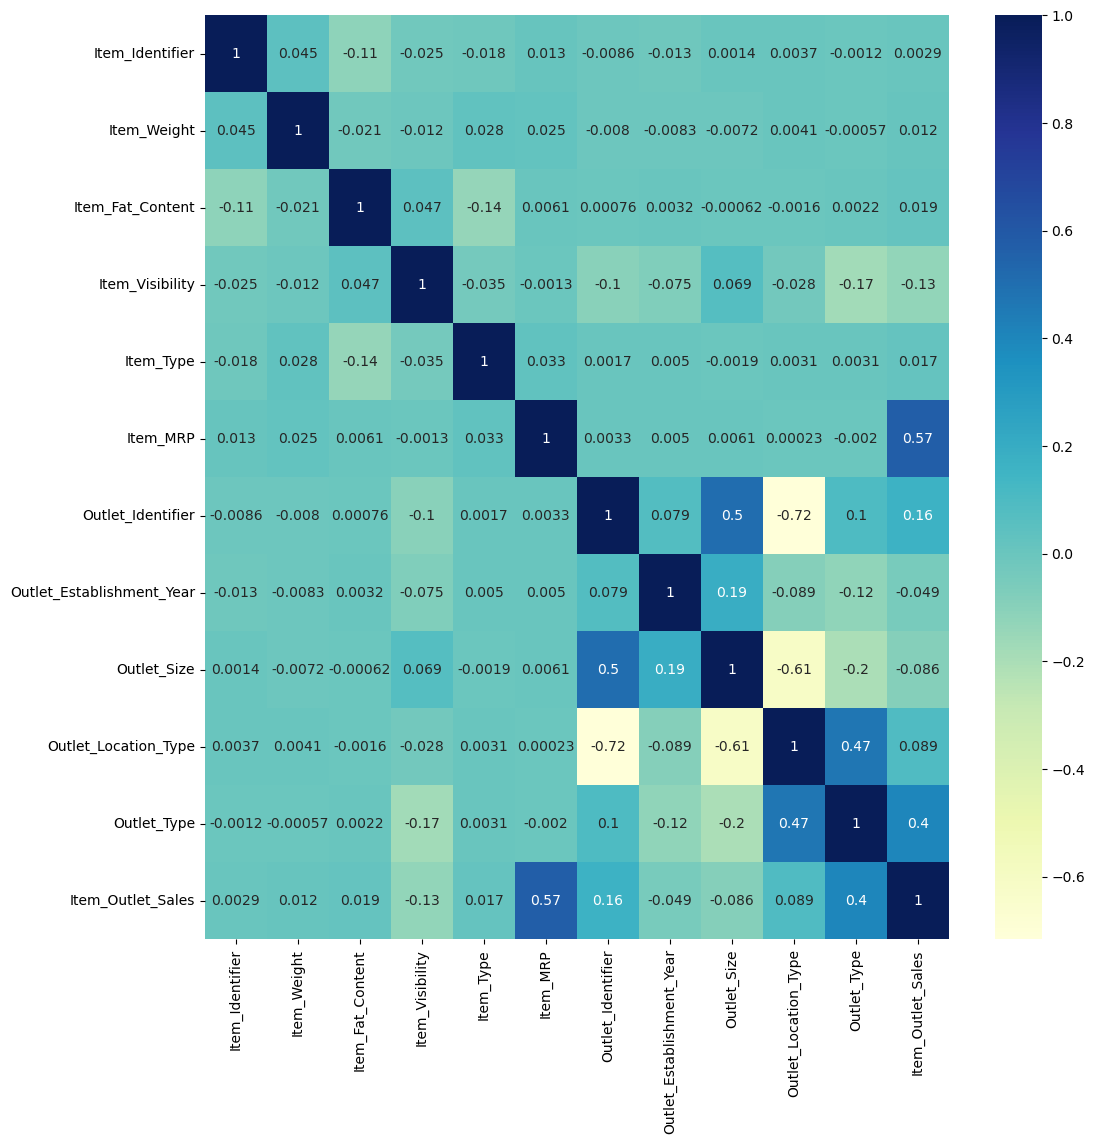

In [42]:
cm = df.corr()
cmap = 'YlGnBu'
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,cmap = cmap);

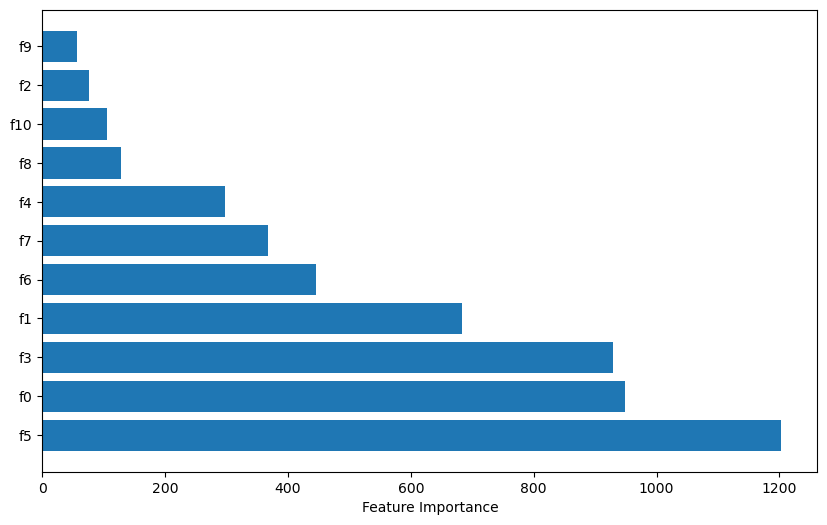

In [43]:
# feature importance
importance = reg.get_booster().get_score(importance_type = "weight")
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances)
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.show()

In [44]:
search_space = {
    "n_estimators": [100,200,350],
    "max_depth": [3,5,8],
    "gamma": [0.01,0.1],
    "learning_rate": [0.001,0.01,0.1,1]
}

In [45]:
GS = GridSearchCV(estimator = model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [46]:
GS.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1553.502) r2: (test=0.098) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1655.251) r2: (test=0.088) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1639.756) r2: (test=0.092) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1571.596) r2: (test=0.097) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1591.104) r2: (test=0.092) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1482.093) r2: (test=0.179) tot

[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1114.669) r2: (test=0.580) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1064.278) r2: (test=0.586) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1112.052) r2: (test=0.556) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350; neg_root_mean_squared_error: (test=-1046.255) r2: (test=0.591) total time=   0.2s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350; neg_root_mean_squared_error: (test=-1113.847) r2: (test=0.587) total time=   0.2s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350; neg_root_mean_squared_error: (test=-1076.443) r2: (test=0.609) total time=   0.2s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_dep

[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=350; neg_root_mean_squared_error: (test=-1111.954) r2: (test=0.557) total time=   0.3s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1084.429) r2: (test=0.560) total time=   0.2s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1160.309) r2: (test=0.552) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1093.909) r2: (test=0.596) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1066.475) r2: (test=0.584) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1123.651) r2: (test=0.547) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n

[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=200; neg_root_mean_squared_error: (test=-1457.187) r2: (test=0.283) total time=   0.4s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=200; neg_root_mean_squared_error: (test=-1449.335) r2: (test=0.232) total time=   0.3s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=200; neg_root_mean_squared_error: (test=-1465.701) r2: (test=0.229) total time=   0.2s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=350; neg_root_mean_squared_error: (test=-1453.754) r2: (test=0.210) total time=   0.6s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=350; neg_root_mean_squared_error: (test=-1499.081) r2: (test=0.252) total time=   0.5s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=350; neg_root_mean_squared_error: (test=-1470.759) r2: (test=0.270) total time=   0.5s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=5, n_estimators=35

[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=8, n_estimators=100; neg_root_mean_squared_error: (test=-1641.642) r2: (test=0.103) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=8, n_estimators=100; neg_root_mean_squared_error: (test=-1626.805) r2: (test=0.106) total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=8, n_estimators=100; neg_root_mean_squared_error: (test=-1557.948) r2: (test=0.112) total time=   0.2s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=8, n_estimators=100; neg_root_mean_squared_error: (test=-1581.948) r2: (test=0.102) total time=   0.2s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=8, n_estimators=200; neg_root_mean_squared_error: (test=-1468.316) r2: (test=0.194) total time=   0.4s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=8, n_estimators=200; neg_root_mean_squared_error: (test=-1561.891) r2: (test=0.188) total time=   0.4s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_dep

[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=200; neg_root_mean_squared_error: (test=-1122.980) r2: (test=0.548) total time=   0.7s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=350; neg_root_mean_squared_error: (test=-1099.501) r2: (test=0.548) total time=   1.2s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=350; neg_root_mean_squared_error: (test=-1139.827) r2: (test=0.568) total time=   1.3s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=350; neg_root_mean_squared_error: (test=-1114.442) r2: (test=0.581) total time=   1.2s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=350; neg_root_mean_squared_error: (test=-1065.269) r2: (test=0.585) total time=   1.5s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=350; neg_root_mean_squared_error: (test=-1121.697) r2: (test=0.549) total time=   1.1s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_

[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1205.581) r2: (test=0.469) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1245.489) r2: (test=0.444) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1277.885) r2: (test=0.389) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1329.672) r2: (test=0.412) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1266.205) r2: (test=0.459) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1240.021) r2: (test=0.438) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 350]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [47]:
print(GS.best_params_)

{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 350}


In [48]:
print(GS.best_score_)

0.5936653240008501


In [50]:
best_params = GS.best_params_
best_model = GS.best_estimator_

In [59]:
pred = best_model.predict(x_test)
r2_t_new = metrics.r2_score(y_test , pred) 
print(f"prediction = {r2_t_new}")

prediction = 0.5999978689934333
